In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

from scipy import stats as sts
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df_train = pd.read_csv('laptops_train.csv')
df_test = pd.read_csv('laptops_test.csv')

In [3]:
df_train['Weight'] = df_train['Weight'].str.replace('kg','')
df_train['Screen Size'] = df_train['Screen Size'].str.strip('"')

In [4]:
df_train.dtypes

,0
Manufacturer,object
Model Name,object
Category,object
Screen Size,object
Screen,object
CPU,object
RAM,object
Storage,object
GPU,object
Operating System,object


In [5]:
df_train['Weight'] = df_train['Weight'].astype(float)
df_train['Screen Size'] = df_train['Screen Size'].astype(float)

In [6]:
def fetch_processor(text):
  if 'Intel Core i5' in text:
    return 'Intel Core i5'
  elif 'Intel Core i7' in text:
    return 'Intel Core i7'
  elif 'Intel Core i3' in text:
    return 'Intel Core i3'
  elif text.startswith('Intel'):
    return 'Other Intel Processor'
  else:
    return 'AMD Processor'

In [7]:
df_train['CPU brand'] = df_train['CPU'].apply(fetch_processor)

<Axes: xlabel='CPU brand'>

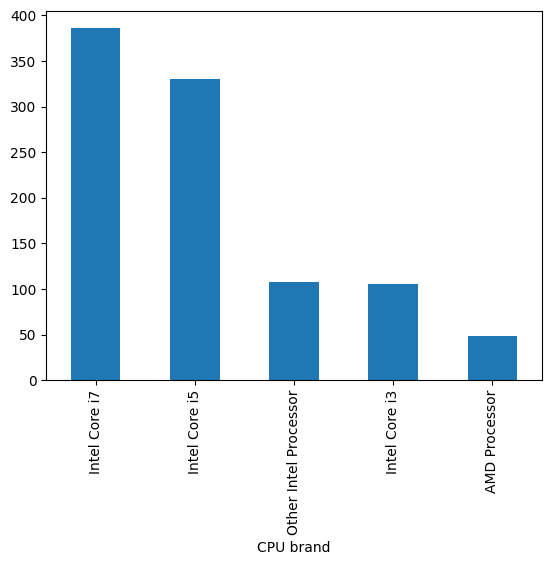

In [8]:
df_train['CPU brand'].value_counts().plot(kind='bar')

In [9]:
def gpu_type(text):
  if 'Intel' in text:
    return 'Intel'
  elif 'AMD' in text:
    return 'AMD'
  elif 'NVIDIA' in text:
    return 'NVIDIA'
  else:
    return 'Other GPU'

In [10]:
df_train['GPU'] = df_train['GPU'].apply(gpu_type)

<Axes: xlabel='GPU'>

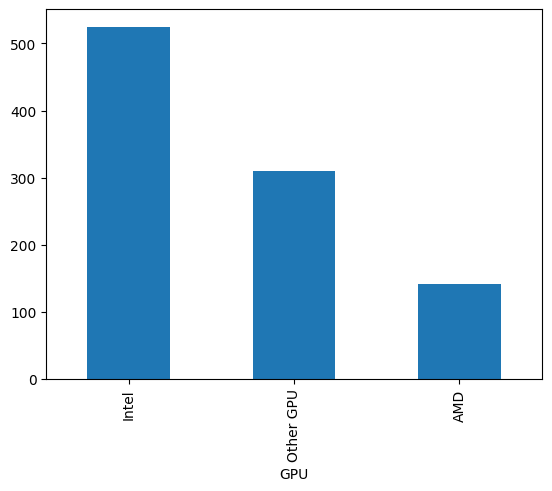

In [11]:
df_train['GPU'].value_counts().plot(kind='bar')

In [12]:
df_train['Operating System'] = df_train['Operating System'].str.replace('Mac OS','macOS')
df_train['Screen Quality'] = df_train['Screen'].str.slice(9)

<Axes: xlabel='Screen Quality'>

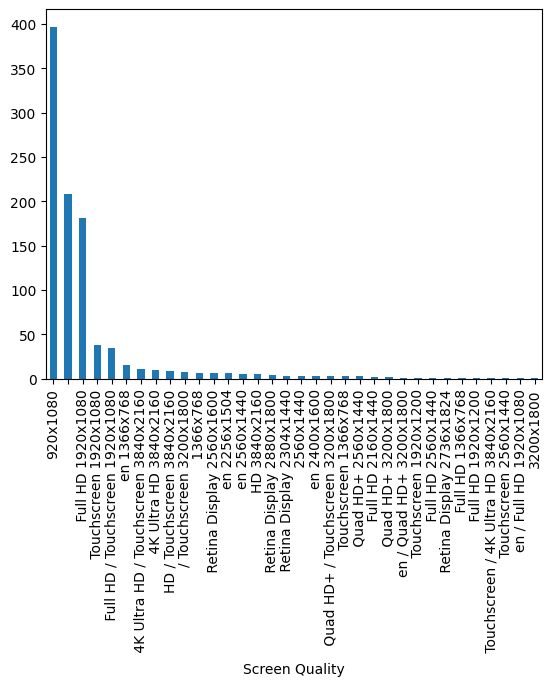

In [13]:
df_train['Screen Quality'].value_counts().plot(kind='bar')

In [14]:
def fetch_storage(text):
    if '128GB SSD' in text:
        return '128GB SSD'
    elif '256GB SSD' in text:
        return '256GB SSD'
    elif '512GB SSD' in text:
        return '512GB SSD'
    elif '500GB HDD' in text:
        return '500GB HDD'
    elif '1TB HDD' in text:
        return '1TB HDD'
    elif 'Flash Storage' in text:
        return 'Flash Storage'
    else:
        return 'Mixed Storage'

In [15]:
df_train['Storage Type'] = df_train[' Storage'].apply(fetch_storage)

<Axes: xlabel='Storage Type'>

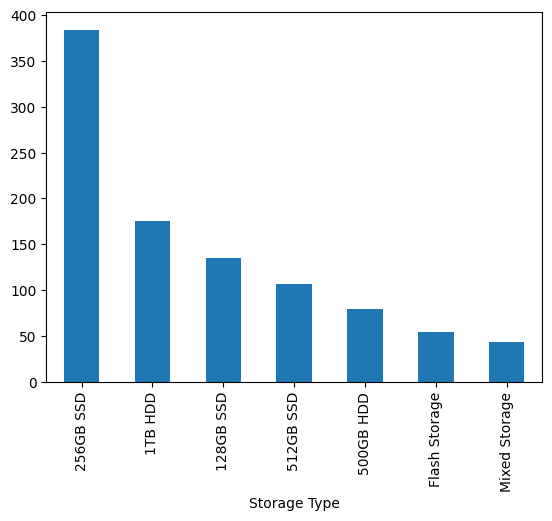

In [16]:
df_train['Storage Type'].value_counts().plot(kind='bar')

/tmp/ipython-input-3328462365.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[i].set_xticklabels(axis[i].get_xticklabels(),rotation=90)
/tmp/ipython-input-3328462365.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[i].set_xticklabels(axis[i].get_xticklabels(),rotation=90)
/tmp/ipython-input-3328462365.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[i].set_xticklabels(axis[i].get_xticklabels(),rotation=90)
/tmp/ipython-input-3328462365.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[i].set_xticklabels(axis[i].get_xticklabels(),rotation=90)
/tmp/ipython-input-3328462365.py:7: UserWarning: set_ticklabels() should only be use

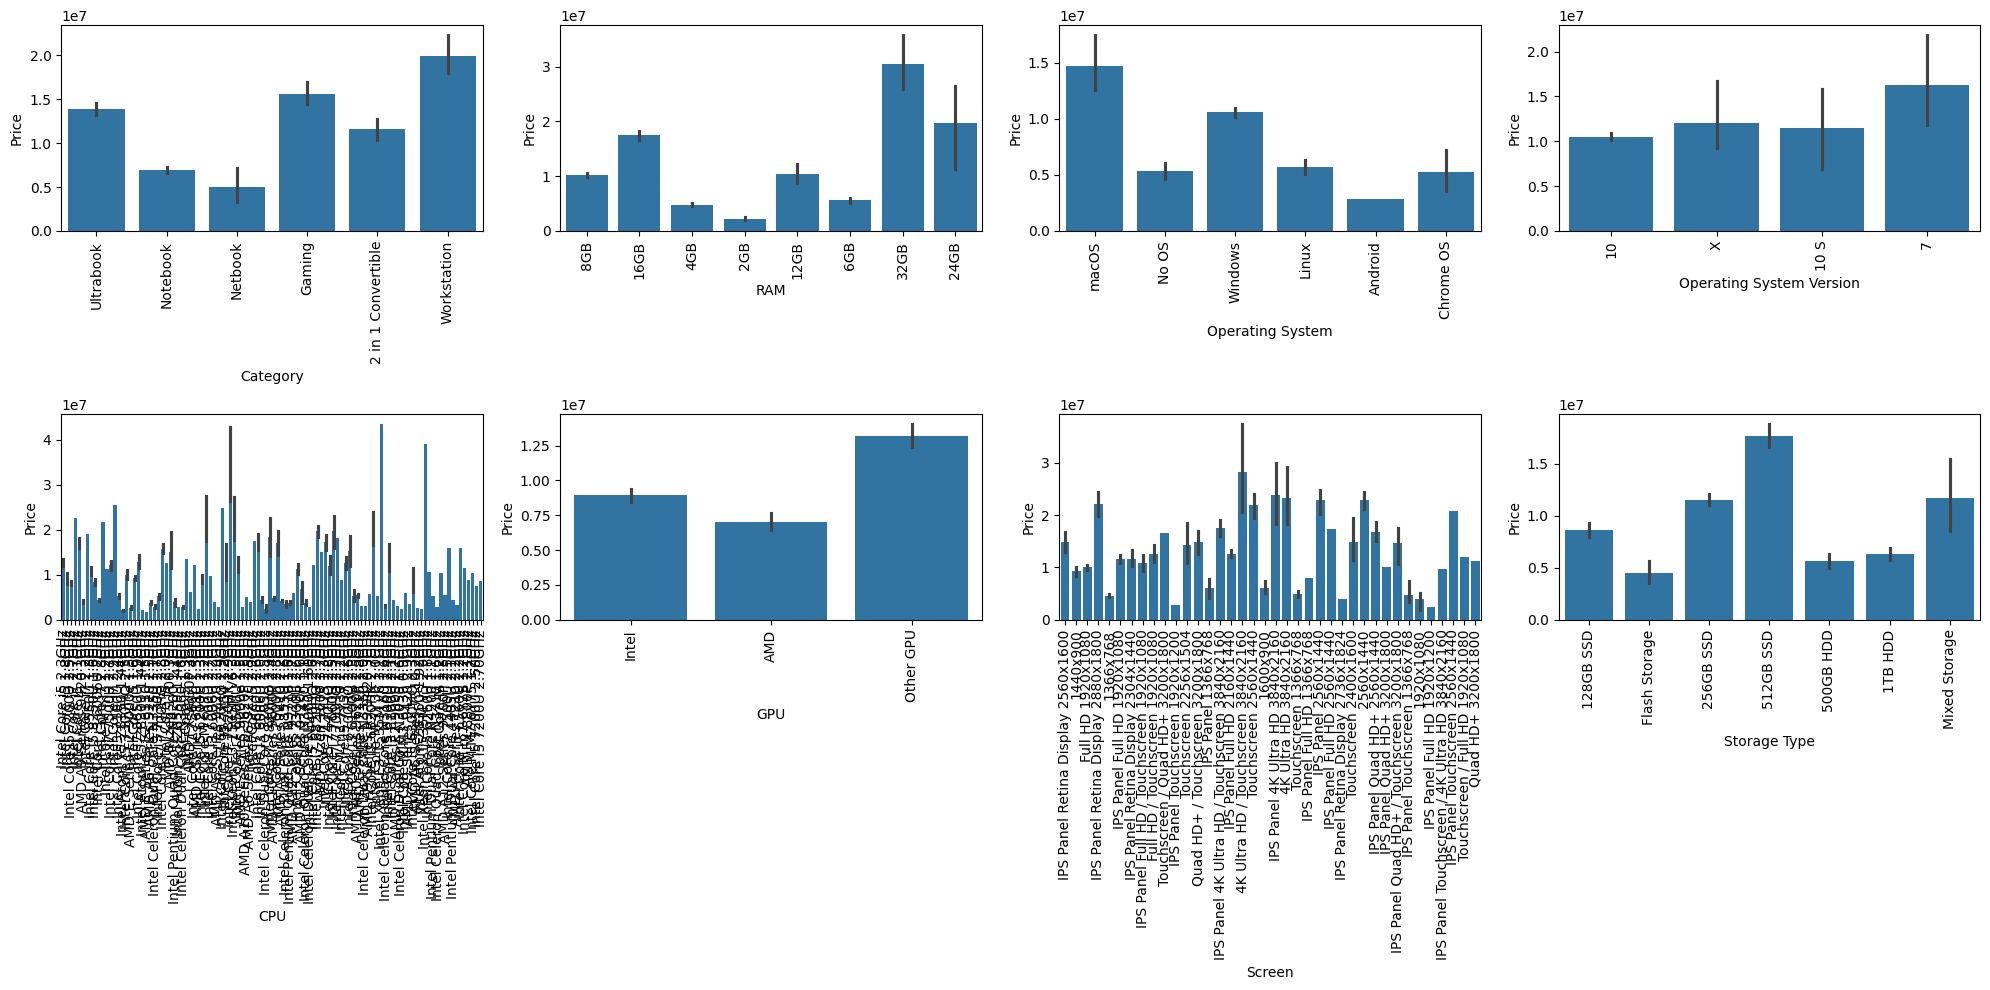

In [17]:
cat_var = ['Category', 'RAM', 'Operating System', 'Operating System Version', 'CPU', 'GPU', 'Screen', 'Storage Type']
fig,axis = plt.subplots(2, 4, figsize=(20, 10))
axis = axis.flatten()

for i,var in enumerate(cat_var):
  sns.barplot(data=df_train, x=var,y='Price', ax=axis[i])
  axis[i].set_xticklabels(axis[i].get_xticklabels(),rotation=90)

fig.tight_layout()
plt.show()

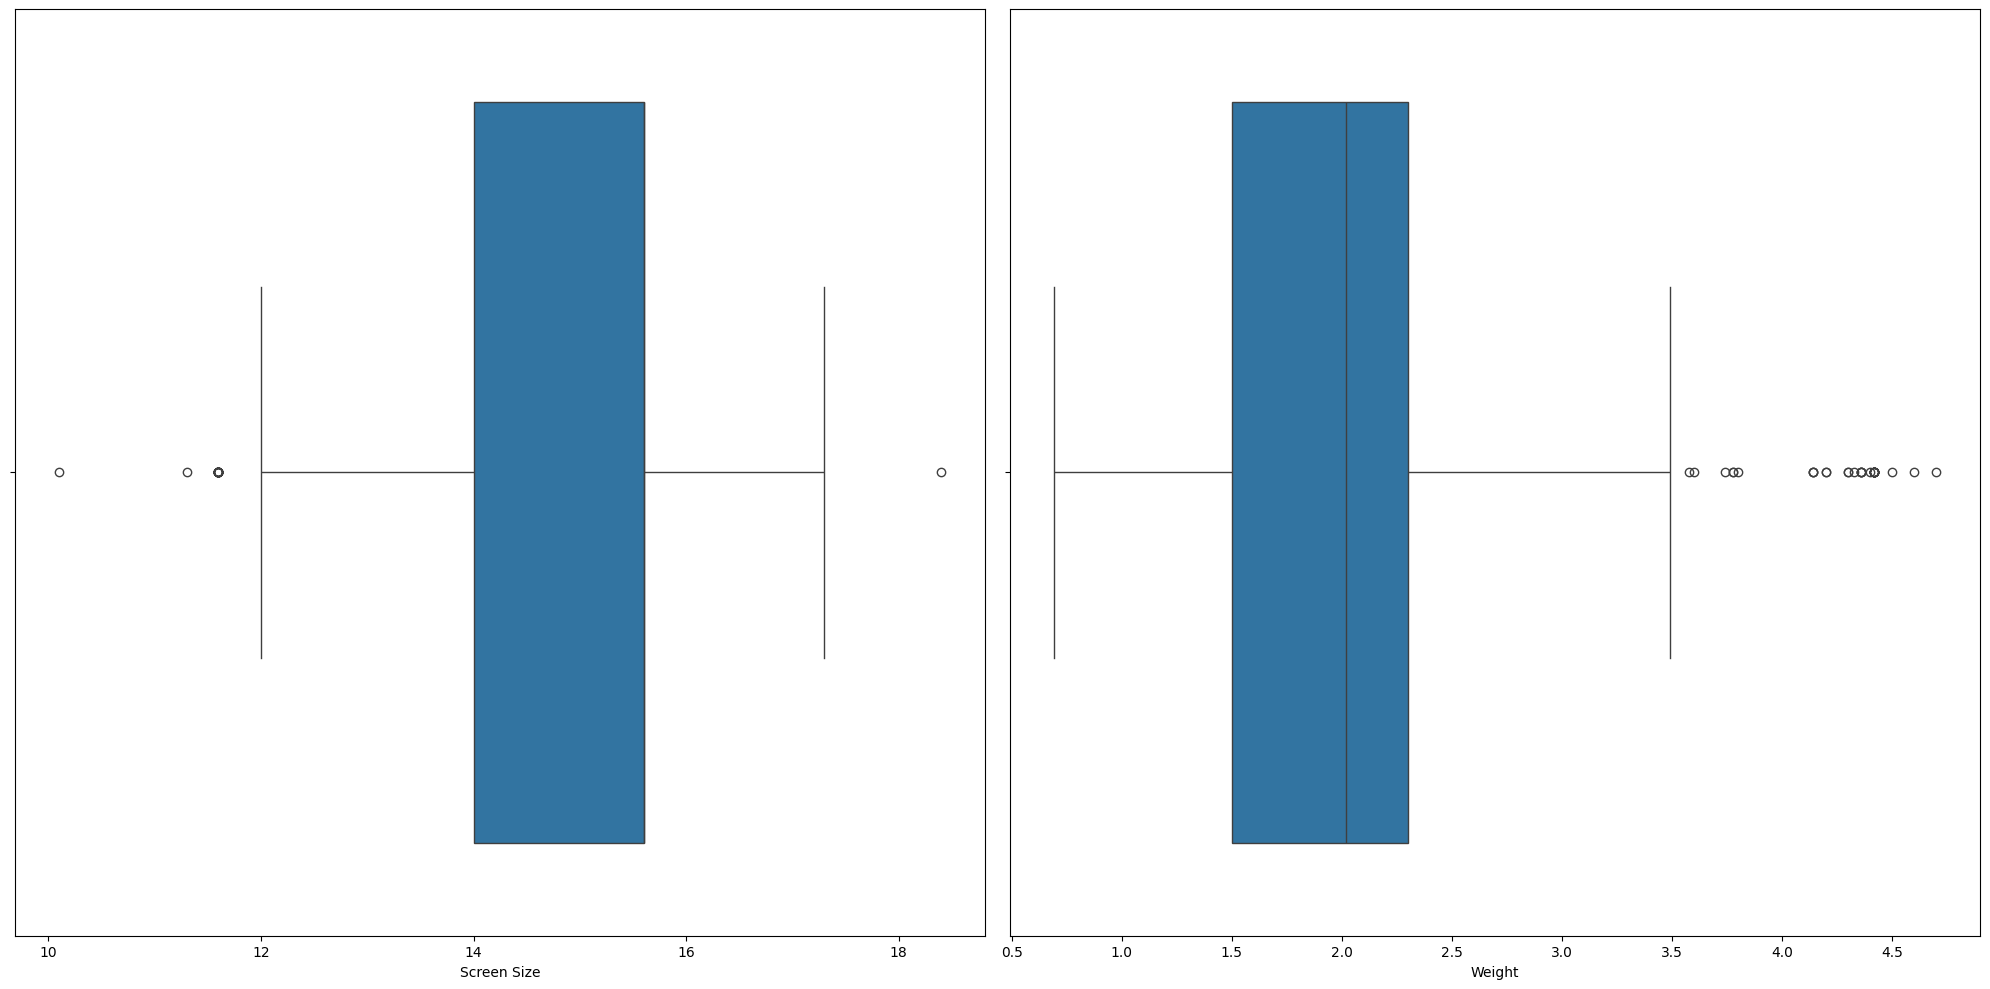

In [18]:
num_vars = ['Screen Size', 'Weight']

fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df_train, ax=axs[i])

fig.tight_layout()

plt.show()

In [19]:
df_train.drop(['Model Name', 'Screen', 'CPU', ' Storage', 'GPU'],axis=1,inplace=True)
df_train.shape

(977, 11)

In [20]:
df_train.isnull().sum()

,0
Manufacturer,0
Category,0
Screen Size,0
RAM,0
Operating System,0
Operating System Version,136
Weight,0
Price,0
CPU brand,0
Screen Quality,0


In [21]:
df_train.fillna('Unknown',inplace=True)
df_train.head()

,Manufacturer,Category,Screen Size,RAM,Operating System,Operating System Version,Weight,Price,CPU brand,Screen Quality,Storage Type
0,Apple,Ultrabook,13.3,8GB,macOS,Unknown,1.37,11912523.48,Intel Core i5,Retina Display 2560x1600,128GB SSD
1,Apple,Ultrabook,13.3,8GB,macOS,Unknown,1.34,7993374.48,Intel Core i5,,Flash Storage
2,HP,Notebook,15.6,8GB,No OS,Unknown,1.86,5112900.00,Intel Core i5,920x1080,256GB SSD
3,Apple,Ultrabook,15.4,16GB,macOS,Unknown,1.83,22563005.40,Intel Core i7,Retina Display 2880x1800,512GB SSD
4,Apple,Ultrabook,13.3,8GB,macOS,Unknown,1.37,16037611.20,Intel Core i5,Retina Display 2560x1600,256GB SSD


In [22]:
from sklearn.preprocessing import LabelEncoder

for col in df_train.select_dtypes(include=['object']).columns:
  le = LabelEncoder()
  df_train[col] = le.fit_transform(df_train[col])
  print(f"{col}: {df_train[col].unique()}")

Manufacturer: [ 1  7  0  2  4 10  3 11 13 16  8 18 17 14 12 15  6  5  9]
Category: [4 3 2 1 0 5]
RAM: [7 1 5 3 0 6 4 2]
Operating System: [5 3 4 2 0 1]
Operating System Version: [3 0 4 1 2]
CPU brand: [2 3 0 1 4]
Screen Quality: [15  0 25 17  7 14  5 20 29 21 31 23  1  3  9 26 33  4 27 30  6  2 10 16
 32 12 13 11 19  8 18 22 28 24]
Storage Type: [0 5 2 4 3 1 6]


In [23]:
def remove_outliers(df_train,cols):
  for col in cols:
    z = np.abs(sts.zscore(df_train[col]))
    df_train = df_train[(z < 3) | (df_train[col].isnull())]
  return df_train

In [24]:
sc = ['Screen Size','Weight']
dfc = remove_outliers(df_train,sc)
dfc.shape

(949, 11)

In [25]:
x = dfc.drop('Price',axis=1)
y = dfc['Price']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
dt = DecisionTreeRegressor()

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

print(grid_search.best_estimator_)

DecisionTreeRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10)


In [27]:
dt = DecisionTreeRegressor(max_depth=10, max_features='sqrt', min_samples_split=5,random_state=42)
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, max_features='sqrt', min_samples_split=5,
                      random_state=42)

In [28]:
y_pred = dt.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 2080213.8310509576
Mean Squared Error (MSE): 10632647484599.377
Root Mean Squared Error (RMSE): 3260774.062182073


In [29]:
rf = RandomForestRegressor()
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['log2', 'sqrt']
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

print(grid_search.best_estimator_)

RandomForestRegressor(max_depth=9, max_features='sqrt')


In [30]:
rf = RandomForestRegressor(max_depth=9, max_features='sqrt', n_estimators=50,random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=9, max_features='sqrt', n_estimators=50,
                      random_state=42)

In [31]:
from sklearn.linear_model import LinearRegression

ler = LinearRegression()
ler.fit(x_train, y_train)
y_pred = ler.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 3675195.122432967
Mean Squared Error (MSE): 29332118408761.38
Root Mean Squared Error (RMSE): 5415913.441771515


In [32]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor()
ada.fit(x_train, y_train)
y_pred = ada.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 3174777.3082650863
Mean Squared Error (MSE): 19345926269893.316
Root Mean Squared Error (RMSE): 4398400.421732123


In [33]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

xgb = XGBRegressor()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 1814452.5136315788
Mean Squared Error (MSE): 14850762653549.06
Root Mean Squared Error (RMSE): 3853668.7264928548


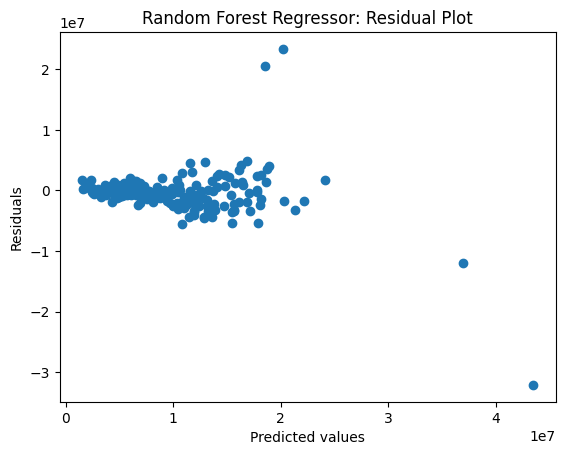

In [34]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Random Forest Regressor: Residual Plot")
plt.show()

Feature Importances from Random Forest Regressor:
RAM                         0.259966
Category                    0.169411
Weight                      0.140723
Screen Quality              0.137632
CPU brand                   0.107430
Storage Type                0.069209
Manufacturer                0.045987
Screen Size                 0.040723
Operating System            0.018119
Operating System Version    0.010799
dtype: float64


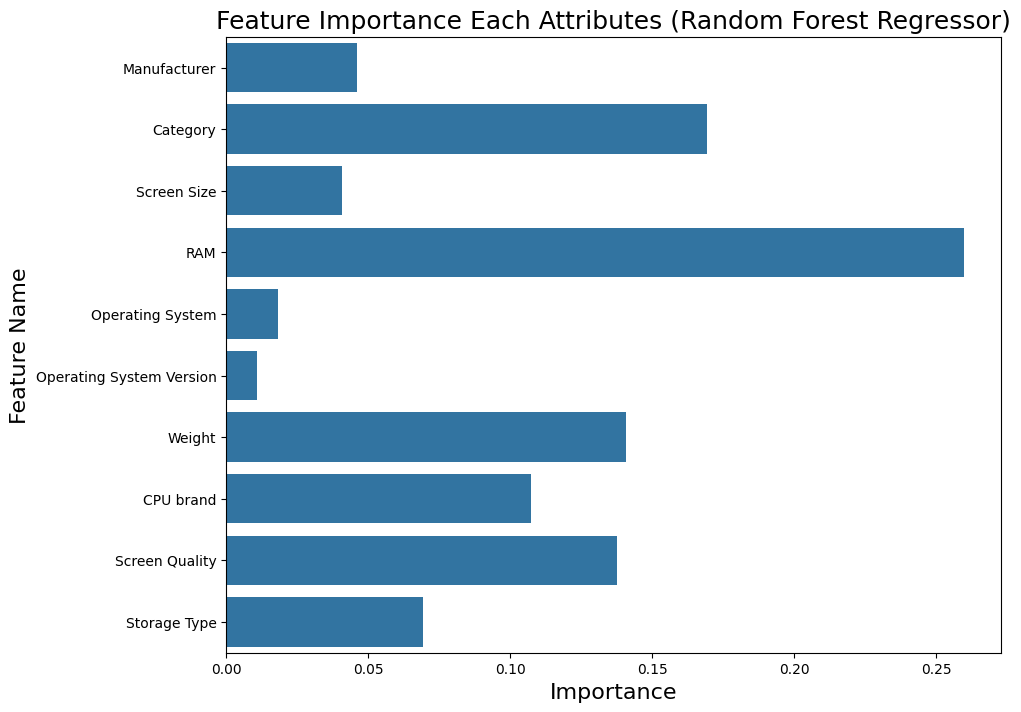

In [35]:
feature_importances = pd.Series(rf.feature_importances_, index=x_train.columns)
print("Feature Importances from Random Forest Regressor:")
print(feature_importances.sort_values(ascending=False))

plt.figure(figsize=(10,8))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title('Feature Importance Each Attributes (Random Forest Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Feature Importances from Random Forest Regressor:
RAM                         0.319504
Screen Quality              0.297106
Weight                      0.196193
Storage Type                0.061009
CPU brand                   0.034843
Category                    0.027755
Operating System Version    0.021949
Manufacturer                0.019854
Screen Size                 0.014437
Operating System            0.007349
dtype: float64


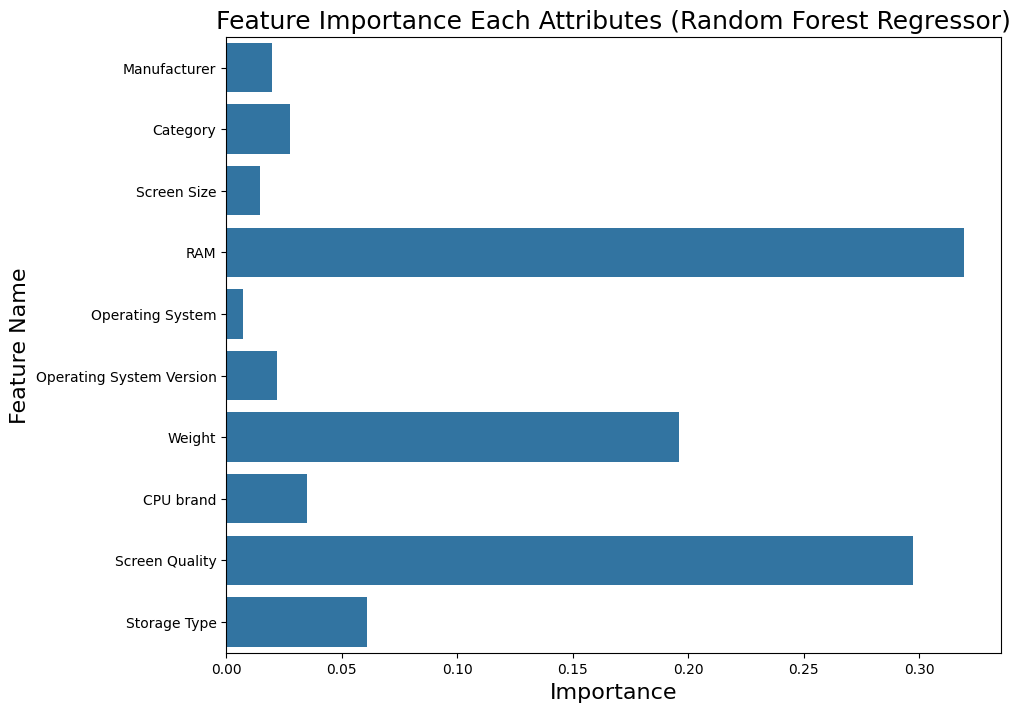

In [36]:
feature_importances = pd.Series(dt.feature_importances_, index=x_train.columns)
print("Feature Importances from Random Forest Regressor:")
print(feature_importances.sort_values(ascending=False))

plt.figure(figsize=(10,8))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title('Feature Importance Each Attributes (Random Forest Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [37]:
df_test['Weight'] = df_test['Weight'].str.strip('kg')
df_test['Screen Size'] = df_test['Screen Size'].str.strip('"')

In [38]:
df_test['CPU brand'] = df_test['CPU'].apply(fetch_processor)

In [39]:
df_test['Operating System'] = df_test['Operating System'].replace('Mac OS', 'macOS')

In [40]:
df_test['Screen Quality'] = df_test['Screen'].str.slice(-9)

In [41]:
df_test['Storage Type'] = df_test[' Storage'].apply(fetch_storage)

In [42]:
df_test.drop(columns=['Model Name', 'Screen', 'CPU', ' Storage', 'GPU', 'Price'], inplace=True)
df_test.shape

(325, 10)

In [43]:

df_test.fillna('Unknown', inplace=True)
df_test.head()

,Manufacturer,Category,Screen Size,RAM,Operating System,Operating System Version,Weight,CPU brand,Screen Quality,Storage Type
0,HP,Notebook,15.6,6GB,Windows,10,2.04,Intel Core i7,1366x768,1TB HDD
1,Asus,Gaming,17.3,16GB,Windows,10,2.99,Intel Core i7,1920x1080,256GB SSD
2,Dell,2 in 1 Convertible,15.6,12GB,Windows,10,2.19,Intel Core i7,1920x1080,512GB SSD
3,Toshiba,Notebook,13.3,4GB,Windows,7,1.2,Intel Core i5,1920x1080,128GB SSD
4,Lenovo,Notebook,15.6,6GB,Windows,10,2.2,AMD Processor,1920x1080,256GB SSD


In [44]:
for col in df_test.select_dtypes(include=['object']).columns:
  le = LabelEncoder()
  df_test[col] = le.fit_transform(df_test[col])
  print(f"{col}: {df_test[col].unique()}")

Manufacturer: [ 5  2  3 10  6  4  0  7 11  1  8  9]
Category: [3 1 0 2 4 5]
Screen Size: [8 9 5 6 4 1 2 0 3 7]
RAM: [6 1 0 4 7 2 5 3]
Operating System: [4 3 1 5 2 0]
Operating System Version: [0 1 2 3]
Weight: [48 83 55 11 57 64 36 62 71 68 31  2 53 41 34 22  7 69 27 78 19 54 33 43
 23 77 15 30 28 29 26 51 52 65 17 76 38 37 25 92 96  6 42 44 82 97 66 91
 32 86  1 49 18 85  3  0 35 39 74 95 58 81 72  9 61 12 14  4 90 20 46 89
 60 84 40 80 47 16 75 24 88 50 21 45 73 94  8 59 70 87 56  5 79 67 13 93
 63 10]
CPU brand: [3 2 0 4 1]
Screen Quality: [1 3 8 9 7 5 2 4 6 0]
Storage Type: [1 2 4 0 3 6 5]


In [45]:
df_test.head()

,Manufacturer,Category,Screen Size,RAM,Operating System,Operating System Version,Weight,CPU brand,Screen Quality,Storage Type
0,5,3,8,6,4,0,48,3,1,1
1,2,1,9,1,4,0,83,3,3,2
2,3,0,8,0,4,0,55,3,3,4
3,10,3,5,4,4,1,11,2,3,0
4,6,3,8,6,4,0,57,0,3,2


In [46]:
y_pred_proba = rf.predict(df_test)
y_pred_prob_df = pd.DataFrame(data=y_pred_proba)
y_pred_prob_df

,0
0,1.139753e+07
1,1.832160e+07
2,1.935863e+07
3,1.713975e+07
4,1.074247e+07
...,...
320,1.701970e+07
321,1.960027e+07
322,1.473123e+07
323,1.139753e+07
